# K- Means Model - Wine Quality Clustering

Source - Kaggle (https://www.kaggle.com/code/digvijaysingh16/k-mean-clustering-for-wine-quality-data/input)



In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import Data
data = pd.read_csv('drive/My Drive/Colab Notebooks/winequality.csv')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [ ]:
# Any NA entries
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

The data does not have any null values.

In [ ]:
# Let's explore Unique Quality classes
data['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [ ]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
# Percent target classes
data['quality'].value_counts(normalize=True)*100

6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64

In [ ]:
# Coverting 'color' column to numeric value from string
data['color'].unique()

array(['red', 'white'], dtype=object)

In [ ]:
data = pd.get_dummies(data,drop_first=True, columns=['color'])

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0


In [ ]:
# X and y
X = data.drop(columns=['quality'])
y = data['quality']

In [ ]:
# Scaling X
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
# Using a function to fit K-means and evaluate inertia for different vlaues of k.

num_clusters = [i for i in range(2,15)]

def kmeans_inertia(num_clusters, x):
  """
  inputs = number of clusters and X dataset
  fit x in Kmeans model
  output = inertia
  """

  inertia = []

  for num in num_clusters:
    kms = KMeans(n_clusters=num, random_state=42)
    kms.fit(x)
    inertia.append(kms.inertia_)

  return inertia

In [ ]:
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[62847.27256633083,
 51995.22352009665,
 47223.67931496111,
 42517.91422906508,
 40517.62049862834,
 38270.22810800922,
 36966.146027972994,
 35755.548900997186,
 34569.24886378994,
 33733.92598640087,
 32706.254722954676,
 31874.97505176048,
 30928.82517796199]

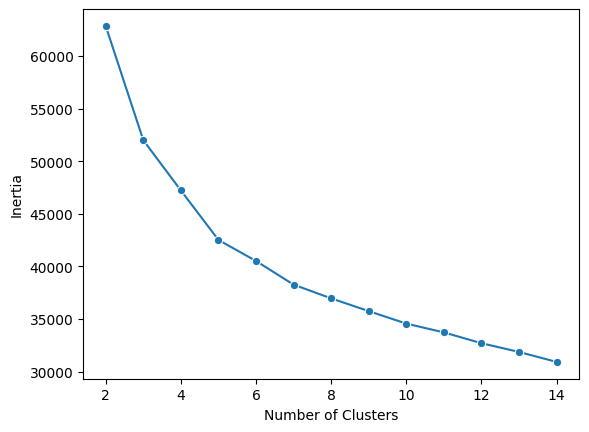

In [ ]:
# Plotting number of clusters vs. inertia

plot = sns.lineplot(x=num_clusters, y=inertia, marker='o')
plot.set_xlabel("Number of Clusters");
plot.set_ylabel("Inertia");

The plot seems to show an elbow at 5 clusters and we cannot confirm that 5 clusters is optimal solution. Thus, we will check for silhouettte score.

In [ ]:
# Result and Evaluation using sihouette_score()

def kmeans_sil(num_clusters, x):
  """
  Input = number of clusters and x data
  output = silhouette score
  fit Kmeans model
  recalculate silhouetter score for each k value
  """

  sil_score = []

  for num in num_clusters:
    kms = KMeans(n_clusters=num, random_state=42)
    kms.fit(x)
    sil_score.append(silhouette_score(x,kms.labels_))
  return sil_score

In [ ]:
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.3154032859841463,
 0.23383116062431092,
 0.23594888101066816,
 0.22764063399023537,
 0.18967543459100863,
 0.19439477123082535,
 0.17500262781016737,
 0.16955841051213308,
 0.14524990120399223,
 0.1486362361499809,
 0.14140290697022784,
 0.17287702933952517,
 0.1423682339217203]

Text(0, 0.5, 'Silhouette Score')

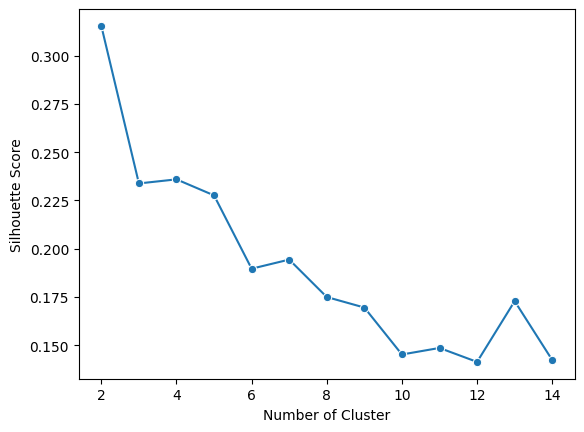

In [ ]:
# Line Plot of Silhouette score vs Number of clusters

plot = sns.lineplot(x=num_clusters, y=sil_score, marker='o')
plot.set_xlabel('Number of Cluster')
plot.set_ylabel('Silhouette Score')

In [ ]:
# Assuming 5 Cluster is the optimal solution
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
print("Unique Labels = ", np.unique(kmeans_5.labels_))

Unique Labels =  [0 1 2 3 4]


In [ ]:
data['cluster'] = kmeans_5.labels_
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color_white,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0,4
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0,4
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,4


In [ ]:
data.groupby(by=['cluster','quality']).size()

cluster  quality
0        3            12
         4            41
         5           770
         6           795
         7           107
         8            17
1        7           786
         8           160
         9             5
2        3             8
         4           116
         5           681
         6          1411
3        3             3
         4            11
         5           195
         6           264
         7           144
         8            14
4        3             7
         4            48
         5           492
         6           366
         7            42
         8             2
dtype: int64

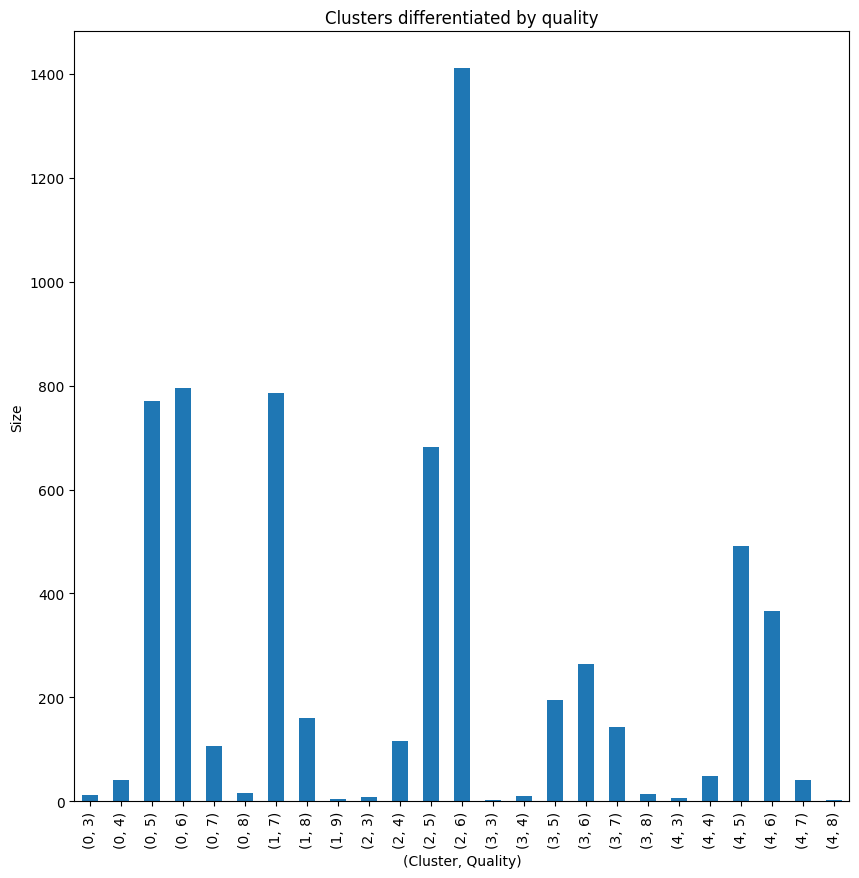

In [ ]:
data.groupby(by=['cluster','quality']).size().plot.bar(title = 'Clusters differentiated by quality',
                                                       figsize=(10,10),
                                                       ylabel='Size',
                                                       xlabel='(Cluster, Quality)');

In [ ]:
data.groupby(by=['cluster','quality','color_white']).size().sort_values(ascending=False)

cluster  quality  color_white
2        6        1              1403
0        6        1               793
1        7        1               773
0        5        1               770
2        5        1               680
4        5        0               486
         6        0               365
3        6        0               263
         5        0               194
1        8        1               158
3        7        0               144
2        4        1               115
0        7        1               107
4        4        0                42
         7        0                42
0        4        1                41
         8        1                17
3        8        0                14
1        7        0                13
0        3        1                12
3        4        0                10
2        6        0                 8
         3        1                 8
4        3        0                 7
         4        1                 6
         5        1 

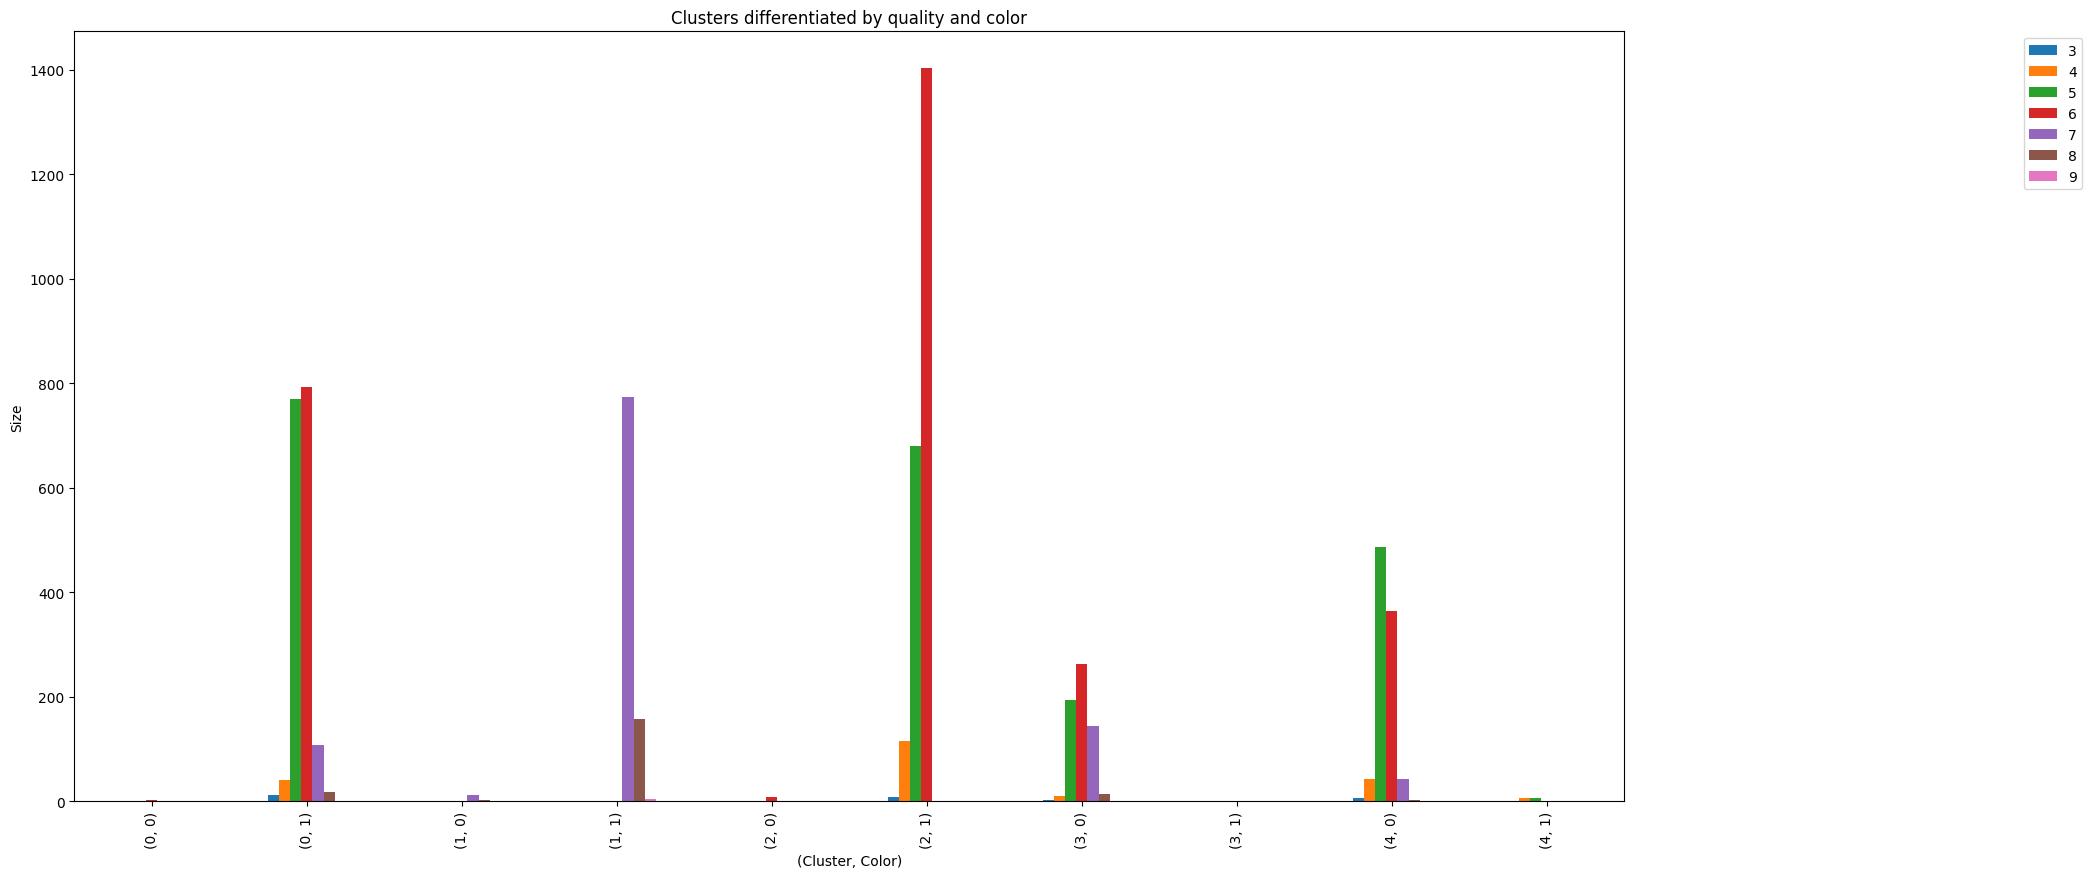

In [ ]:
data.groupby(by=['cluster','quality','color_white']).size().unstack(level = 'quality', fill_value=0).plot.bar(title='Clusters differentiated by quality and color',
                                                                                                                      figsize=(20,10),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Color)')
plt.legend(bbox_to_anchor=(1.3, 1.0))